8 - Considerando os datasets test.csv e train.csv:

Faça a análise de dados, faça tratamento de nulos (não exclua nenhuma linha, faça substituições e explique porque fez, mas se tiver um número muito grande de nulos em uma coluna, pode desconsiderar), simplifique o dataset (SibSp e Parch trazem informações se estavam acompanhados ou não, o que pode ser apenas uma coluna), faça o processo de dummie, considere deletar colunas com informações de baixa correlação (o nome impacta se a pessoa sobreviveu ou não), exclua informações repetidas (se é homem, não vai ser mulher, faz sentido deixar os dois?). Não esqueça que o que for feito no dataset de treino precisa ser feito da mesma maneira para o de teste.

Crie "samples" do dataset e faça o execute as mesmas funções

Todas as funções abaixo quererem a instalação da biblioteca pandas e numpy. É necessário fazer isso apenas uma vez, pelo comando "!pip install nome_da_biblioteca":

In [1]:
!pip install pandas
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\mpatu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\mpatu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Então, é necessário importar a biblioteca

In [3]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

O uso de pandas é baseado em DataFrames (são comos tabelas do excel.) Para abrir um arquivo, é só usar do comando:

pd.read_csv("caminho_do_arquivo.csv")

In [5]:
titanic_df = pd.read_csv("train.csv")

Ao salvar o arquivo a uma variável, você pode executar comandos diretamente nela.

Por exemplo, para mostrar as cinco primeiras linhas, é só usar:

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


O problema principal da aula foi decidir: quais destas colunas podemos remover? Aqui não importaria muito, mas em datasets gigantes, cada milissegundo salvo é dinheiro.

Para mostrar as dimensões:

In [8]:
titanic_df.shape

(891, 12)

E para ver os números de NaN:

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


O número total de valores nulos são:

In [10]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Podemos usar as bibliotecas matplotlib e seaborn para visualizar o comportamento dos valores nulos. Na aula, foi escolhido observar os dados, e depois preencher:

In [11]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

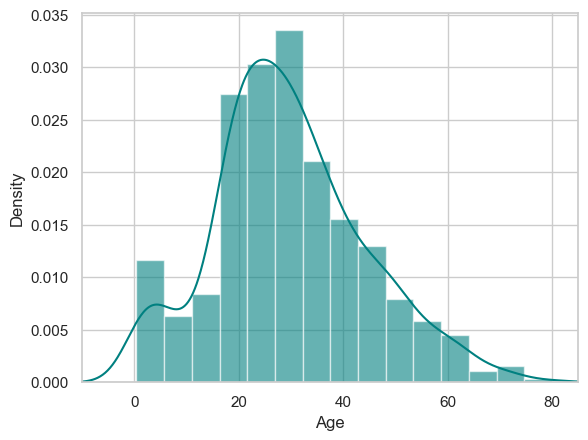

In [12]:
ax = titanic_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Anotação de aula:

Na aula, preenchemos os valores nulos da idade com a média, e vemos que não mudou o formato da curva de distribuição. Isso indica que a média é um bom valor para preencher os valores nulos de idade.

Este gráfico é só para observar o valor da idade antes de preencher.

De aocrdo com o gráfico de dsitribuição, entendemos que podemos subistituir o s dados faltantes de idade pela média, que não impactará na distrbuição da informação

Aqui é analizado se o porto de embarcação impacta ou não a chance de sobreviver.

A coluna Cabin apresenta mais de 75% dos nulos, por ocnta disso entendemos que podemos retirar essa coluna completa

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


C:\Users\mpatu\AppData\Local\Temp\ipykernel_31580\1260776785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=titanic_df, palette='Set2')


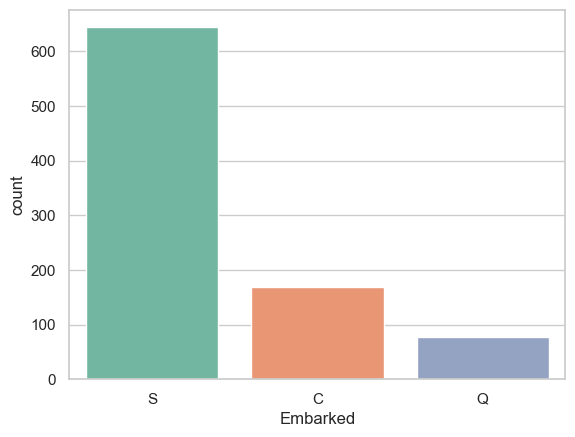

In [13]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(titanic_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=titanic_df, palette='Set2')
plt.show()

In [15]:
data_without_null = titanic_df.copy()
data_without_null["Age"].fillna(titanic_df["Age"].median(skipna=True), inplace=True)
data_without_null["Embarked"].fillna(titanic_df['Embarked'].value_counts().idxmax(), inplace=True)
data_without_null.drop('Cabin', axis=1, inplace=True)

C:\Users\mpatu\AppData\Local\Temp\ipykernel_31580\1332268991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_without_null["Age"].fillna(titanic_df["Age"].median(skipna=True), inplace=True)
C:\Users\mpatu\AppData\Local\Temp\ipykernel_31580\1332268991.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [16]:
data_without_null['TravelAlone']=np.where((data_without_null["SibSp"]+data_without_null["Parch"])>0, 0, 1)
data_without_null.drop('SibSp', axis=1, inplace=True)
data_without_null.drop('Parch', axis=1, inplace=True)

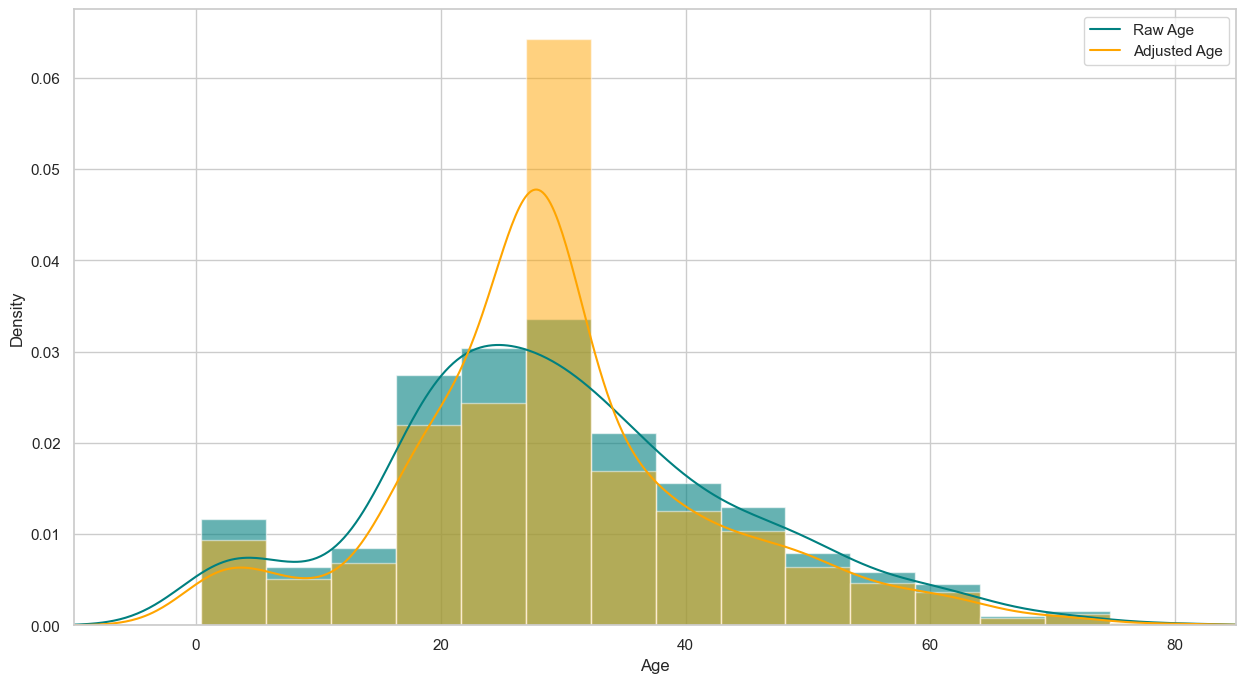

In [17]:
plt.figure(figsize=(15,8))
ax = titanic_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic_df["Age"].plot(kind='density', color='teal')
ax = data_without_null["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
data_without_null["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Anotação de aula:

Na aula, preenchemos os valores nulos da idade com a média, e vemos que não mudou o formato da curva de distribuição. Isso indica que a média é um bom valor para preencher os valores nulos de idade.

C:\Users\mpatu\AppData\Local\Temp\ipykernel_31580\1446948523.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data_without_null["Age"][data_without_null.Survived == 1], color="darkturquoise", shade=True)
C:\Users\mpatu\AppData\Local\Temp\ipykernel_31580\1446948523.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_without_null["Age"][data_without_null.Survived == 0], color="lightcoral", shade=True)


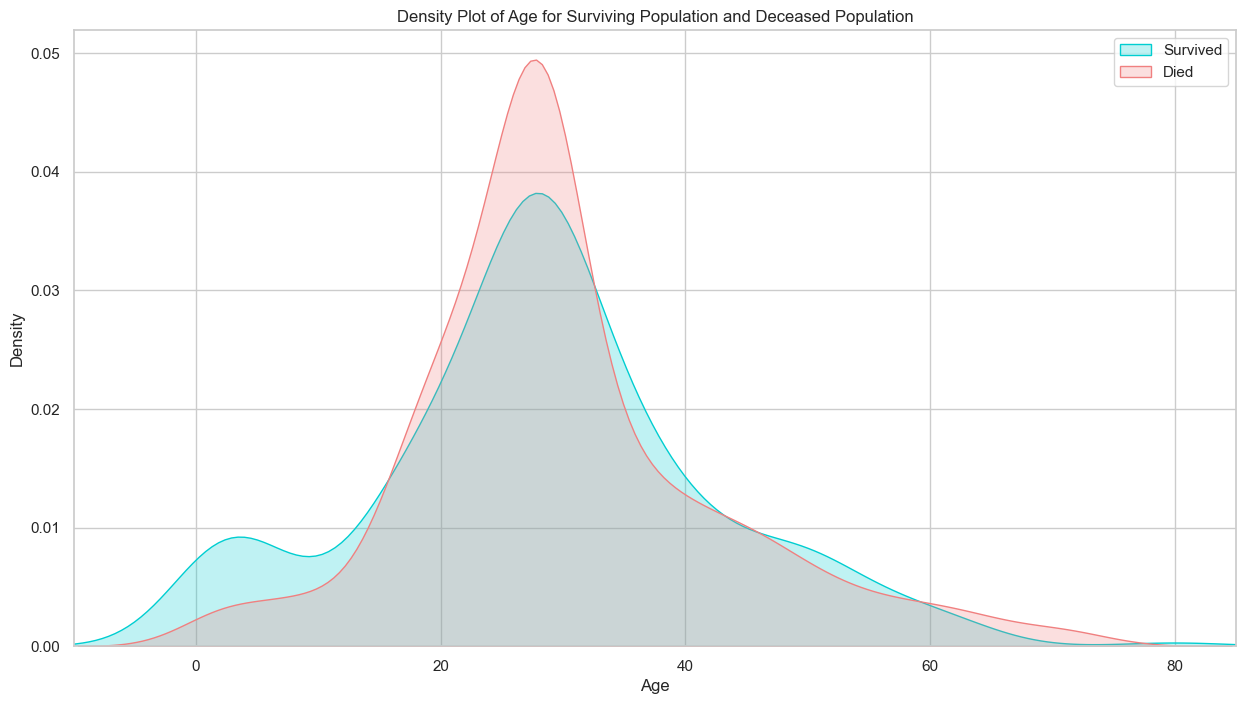

In [18]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data_without_null["Age"][data_without_null.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(data_without_null["Age"][data_without_null.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Vemos que não mudou muito a distribuição de sobreviveu/não sobreviveu. Então a operação é boa.

Na aula, também foi feito gráficos de histogramas para o grupo de embarcação, para determinar se eles impactam ou não a chance de sobreviver.
No caso de grupo de embarcação, substituimos pela moda